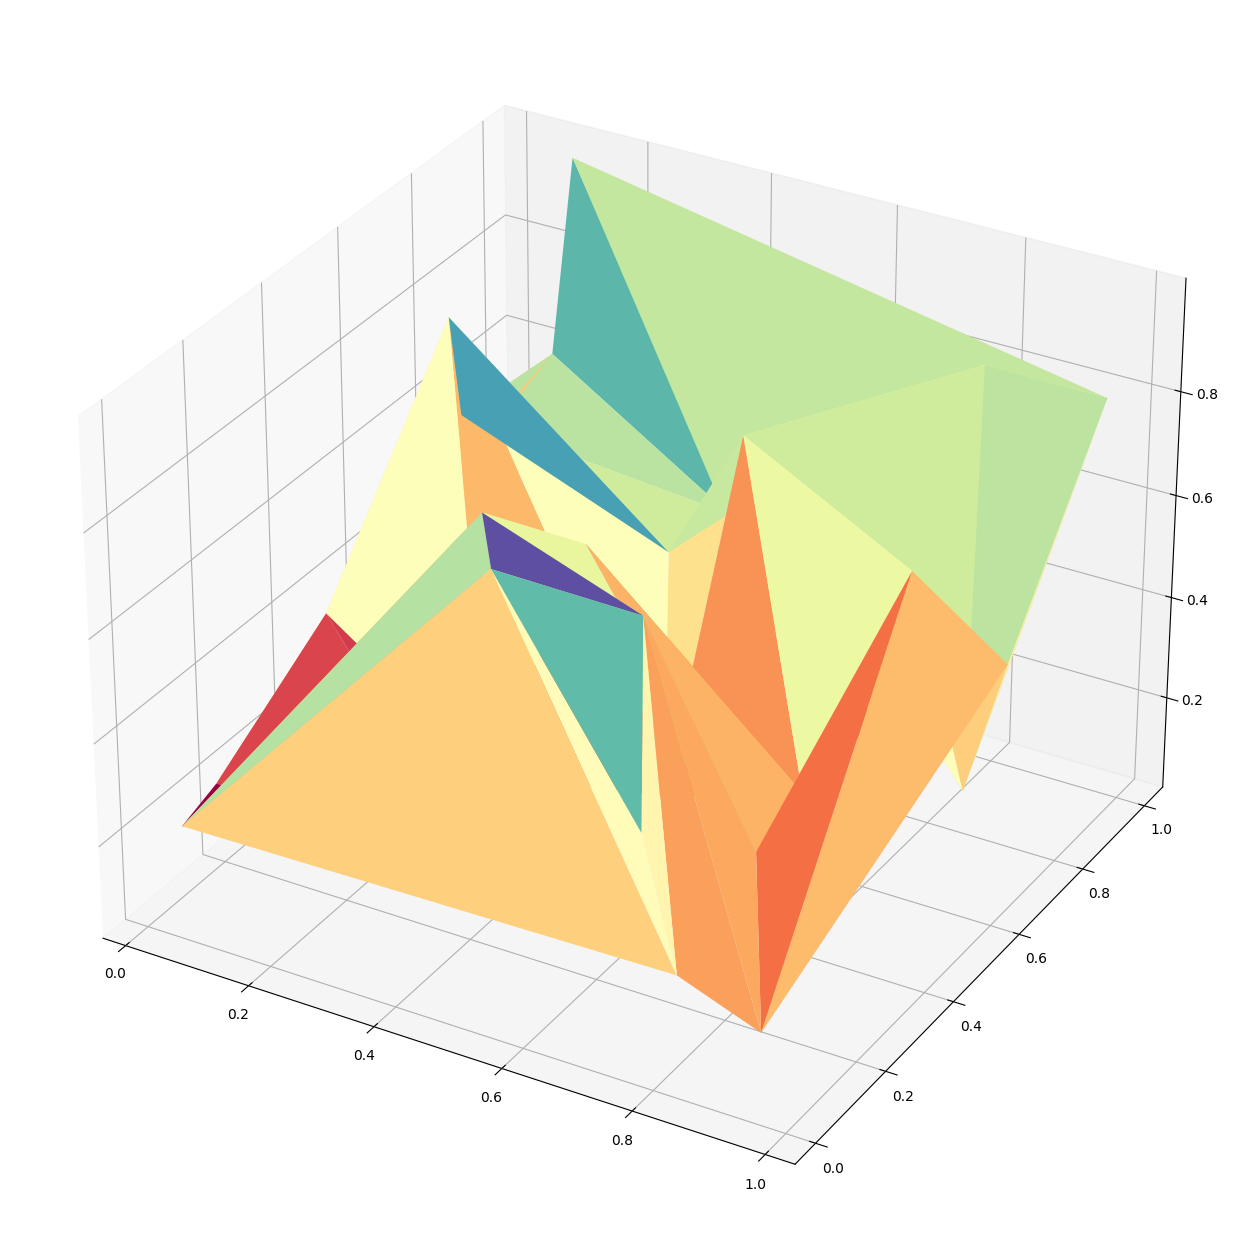

In [4]:
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

points = np.random.rand(30, 3) # generate random 3D points
tri = Delaunay(points) # triangulate the points
print(tri)
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')

# plot the surface
ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=tri.simplices, cmap=plt.cm.Spectral)
plt.show()


In [5]:
from typing import List, Tuple

def art_gallery(points: List[Tuple[int, int]], n: int) -> int:
    # Sort the points by x-coordinate
    points.sort()
    # Create an empty list to store the cameras
    cameras = []
    # Iterate over the points
    for point in points:
        # Check if the point is visible from the last camera
        while len(cameras) > 1 and not is_left(cameras[-2], cameras[-1], point):
            cameras.pop()
        # Add the point as a camera
        cameras.append(point)
    # Return the number of cameras
    return len(cameras)

def is_left(a: Tuple[int, int], b: Tuple[int, int], c: Tuple[int, int]) -> bool:
    #Check if point c is on the left of line ab
    return (b[0] - a[0]) * (c[1] - a[1]) > (b[1] - a[1]) * (c[0] - a[0])

In [4]:
from typing import List, Tuple

def art_gallery(outer_boundary: List[Tuple[int, int]], holes: List[List[Tuple[int, int]]], n: int) -> int:
    # Sort the points of the outer boundary by x-coordinate
    outer_boundary.sort()
    # Create an empty list to store the cameras
    cameras = []
    # Iterate over the points of the outer boundary
    for point in outer_boundary:
        # Check if the point is visible from the last camera
        while len(cameras) > 1 and not is_left(cameras[-2], cameras[-1], point):
            cameras.pop()
        cameras.append(point)
    # Iterate over the holes
    for hole in holes:
        # Sort the points of the hole by x-coordinate
        hole.sort()
        # Initialize the index of the last camera
        i = 0
        # Iterate over the points of the hole
        for point in hole:
            # Check if the point is visible from the last camera
            while i < len(cameras) - 1 and not is_left(cameras[i], cameras[i+1], point):
                i += 1
            if i < len(cameras) - 1:
                cameras[i] = point
    # Return the number of cameras
    return len(cameras)

def is_left(a: Tuple[int, int], b: Tuple[int, int], c: Tuple[int, int]) -> bool:
    #Check if point c is on the left of line ab
    return (b[0] - a[0]) * (c[1] - a[1]) > (b[1] - a[1]) * (c[0] - a[0])


In [6]:
from typing import List, Tuple

def ear_clipping(polygon: List[Tuple[float, float]]) -> List[Tuple[Tuple[float, float], Tuple[float, float], Tuple[float, float]]]:
    def is_ear(i, polygon, indices):
        """
        Helper function to check if the vertex with index i is an ear
        """
        p = polygon[indices[i]]
        prev = polygon[indices[i-1]]
        next = polygon[indices[(i+1) % len(indices)]]
        # Check if the triangle formed by the vertex and its two neighbors is convex
        if (prev[0] - p[0]) * (next[1] - p[1]) - (prev[1] - p[1]) * (next[0] - p[0]) < 0:
            return False
        # Check if the triangle formed by the vertex and its two neighbors contains any other vertex of the polygon
        for j in range(len(indices)):
            if j != i and j != i-1 and j != (i+1) % len(indices):
                if point_in_triangle(polygon[indices[j]], prev, p, next):
                    return False
        return True
    
    def point_in_triangle(p, a, b, c):
        """
        Helper function to check if the point p is inside the triangle formed by the points a, b, c
        """
        def sign(p1, p2, p3):
            return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

        b1 = sign(p, a, b) < 0
       


In [9]:
from scipy.spatial import Delaunay
import numpy as np

# Define the 3D points of the polygon
points = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]])

# Create the Delaunay triangulation
tri = Delaunay(points)

# Print the simplices (indices of the points forming each triangle)
print(tri.simplices)




[[6 3 4 0]
 [6 2 1 0]
 [6 4 1 0]
 [6 3 2 0]
 [6 5 4 1]
 [6 7 3 4]]


In [6]:
from shapely.geometry import Polygon, MultiPoint
from shapely.ops import triangulate

points = [(0,0,0), (1,0,0), (1,1,0), (0,1,0), (0,0,1), (1,0,1), (1,1,1), (0,1,1)]

poly = Polygon(points)

triangles = triangulate(poly)

print(triangles)

[<shapely.geometry.polygon.Polygon object at 0x7f108086a220>, <shapely.geometry.polygon.Polygon object at 0x7f108086a430>]


In [10]:
import numpy as np

def triangulate_polygon(vertices):
    # Create an empty list to store the resulting triangles
    triangles = []
    
    # Create a list of the vertex indices (i.e. the order in which they appear in the polygon)
    vertex_indices = list(range(len(vertices)))
    
    # Loop through the vertex indices, removing ears as we go
    while len(vertex_indices) > 3:
        # Iterate through the vertex indices in a cyclic fashion
        for i in range(len(vertex_indices)):
            # Get the current vertex and the previous and next vertices
            vertex = vertices[vertex_indices[i]]
            prev_vertex = vertices[vertex_indices[i-1]]
            next_vertex = vertices[vertex_indices[(i+1) % len(vertex_indices)]]
            
            # Check if the current vertex is an ear (i.e. it forms a convex angle with the previous and next vertices)
            if is_ear(prev_vertex, vertex, next_vertex):
                # If so, remove the ear by adding the current vertex and the previous and next vertices to the list of triangles
                triangles.append((prev_vertex, vertex, next_vertex))
                
                # Remove the current vertex from the list of vertex indices
                vertex_indices.pop(i)
                
                # Exit the loop and start over with the updated list of vertex indices
                break
                
    # Add the remaining triangle (i.e. the last three remaining vertices) to the list of triangles
    triangles.append((vertices[vertex_indices[0]], vertices[vertex_indices[1]], vertices[vertex_indices[2]]))
    
    return triangles


def is_ear(prev_vertex, vertex, next_vertex):
    # Create a vector from the previous vertex to the current vertex
    prev_vec = np.array(vertex) - np.array(prev_vertex)
    
    # Create a vector from the current vertex to the next vertex
    next_vec = np.array(next_vertex) - np.array(vertex)
    
    # Take the cross product of the two vectors to get the normal vector of the plane defined by the three vertices
    normal = np.cross(prev_vec, next_vec)
    
    # # Take the dot product of the two vectors 
    #     dot_product = np.dot(prev_vec, next_vec)
    #     # Check if the dot product is positive or negative (i.e. if the angle is convex or concave)
    #     return dot_product < 0
    # Check if the z-component of the normal vector is positive or negative (i.e. if the angle is convex or concave)
    return normal[2] > 0


triangulate_polygon(points)

[((0, 1, 1), (0, 0, 0), (1, 0, 0)),
 ((0, 1, 1), (1, 0, 0), (1, 1, 0)),
 ((1, 1, 0), (0, 1, 0), (0, 0, 1)),
 ((1, 1, 0), (0, 0, 1), (1, 0, 1)),
 ((1, 0, 1), (1, 1, 1), (0, 1, 1)),
 ((1, 1, 0), (1, 0, 1), (0, 1, 1))]

In [20]:
import numpy as np

def is_monotone(vertices):
    """A polygon is considered monotone if all the diagonal lines that can be drawn between non-adjacent vertices of the polygon either lie entirely above or entirely below the polygon.

    Args:
        vertices (_type_): _description_

    Returns:
        _type_: _description_
    """
    # Get the normal of the polygon
    vertices = [np.array(v) for v in vertices]
    normal = np.cross(vertices[1] - vertices[0], vertices[2] - vertices[0])

    # Iterate through all possible diagonals
    for i in range(len(vertices)):
        for j in range(i+2, len(vertices)):
            # Get the vector of the diagonal
            diagonal = vertices[j] - vertices[i]
            
            # Get the dot product of the diagonal and the normal
            dot_product = np.dot(diagonal, normal)
            
            # If the dot product is zero, the diagonal is parallel to the normal
            # and cannot be used to determine the monotonicity
            if dot_product == 0:
                continue
            
            # If the dot product is positive, the diagonal is in the same direction as the normal
            # and can be used to determine the monotonicity
            elif dot_product > 0:
                # Check if all points of the polygon are above the diagonal plane
                above = all(np.dot(vertices[k] - vertices[i], diagonal) >= 0 for k in range(len(vertices)) if k!=i and k!=j)
                if not above:
                    return False
            # If the dot product is negative, the diagonal is in the opposite direction as the normal
            # and can be used to determine the monotonicity
            elif dot_product < 0:
                # Check if all points of the polygon are below the diagonal plane
                below = all(np.dot(vertices[k] - vertices[i], diagonal) <= 0 for k in range(len(vertices)) if k!=i and k!=j)
                if not below:
                    return False
    return True


def is_monotone(vertices):
    # Convert the input vertices to numpy arrays for easier vector calculations
    vertices = [np.array(v) for v in vertices]
    
    # Calculate the normal of the polygon
    normal = np.cross(vertices[1] - vertices[0], vertices[2] - vertices[0])
    
    # Loop through the vertices and check if the polygon is monotone
    for i in range(len(vertices)):
        # Get the previous and next vertices
        prev_vertex = vertices[i-1]
        next_vertex = vertices[(i+1) % len(vertices)]
        
        # Calculate the vectors between the current vertex and the previous and next vertices
        prev_vector = prev_vertex - vertices[i]
        next_vector = next_vertex - vertices[i]
        
        # Calculate the dot product between the vectors and the normal
        prev_dot = np.dot(prev_vector, normal)
        next_dot = np.dot(next_vector, normal)
        
        # Check if the dot products have different signs
        if (prev_dot < 0 and next_dot > 0) or (prev_dot > 0 and next_dot < 0):
            return False
    
    # If we've made it this far, the polygon is monotone
    return True


# Create a 3D polygon (a tetrahedron)
polygon = [(0, 0, 0), (1, 0, 0), (0.5, 0.5, 1), (0.5, 1, 0)]
print("Test polygon is monotone:", is_monotone(polygon))

# Test polygon 1 (monotone)
vertices1 = [(1,1,1.01), (2,2,2), (3,3,3), (4,4,4), (5,5,5)]
print("Test polygon 1 is monotone:", is_monotone(vertices1))

# Test polygon 2 (not monotone)
vertices2 = [(1,1,1.01), (2,2,2), (3,3,3), (4,4,4), (5,5,5), (6,6,1)]
print("Test polygon 2 is monotone:", is_monotone(vertices2))

# Test polygon 3 (monotone)
vertices3 = [(1,1,1.01), (2,2,2), (3,3,3), (4,4,4), (5,5,5), (6,6,6)]
print("Test polygon 3 is monotone:", is_monotone(vertices3))


Test polygon is monotone: True
Test polygon 1 is monotone: True
Test polygon 2 is monotone: True
Test polygon 3 is monotone: True


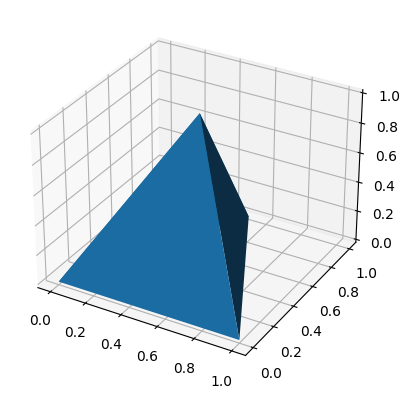

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get the x, y, and z coordinates of the polygon's vertices
x = [v[0] for v in polygon]
y = [v[1] for v in polygon]
z = [v[2] for v in polygon]

# Plot the polygon
ax.plot_trisurf(x, y, z)

# Show the plot
plt.show()


In [18]:
import plotly.graph_objs as go

# Get the x, y, and z coordinates of the polygon's vertices
x = [v[0] for v in polygon]
y = [v[1] for v in polygon]
z = [v[2] for v in polygon]

# Create a Scatter3d plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Show the plot
fig.show()

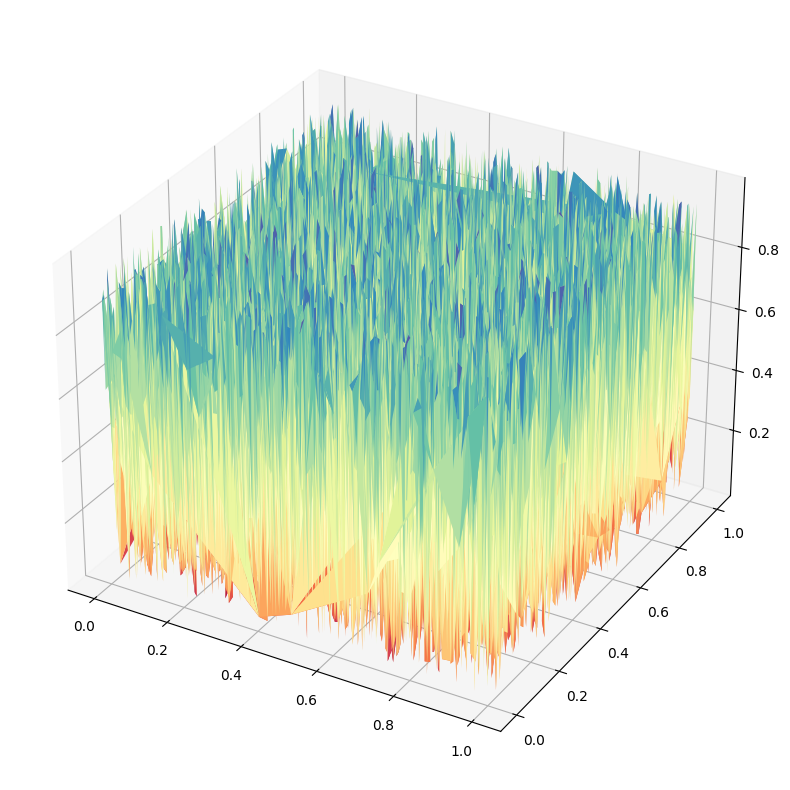

In [27]:
from scipy.spatial import Delaunay
import numpy as np

# Generate some example 3D points
points = np.random.rand(30000, 3)

# Create the TIN surface using the Delaunay triangulation
tri = Delaunay(points)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=tri.simplices, cmap='Spectral')
plt.show()


In [29]:
import numpy as np

# Define the 3D surface as a set of points
surface_points = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]])

# Define the plane using its normal vector and a point on the plane
plane_normal = np.array([1, 1, 1])
plane_point = np.array([0, 0, 0])

# Find the intersection line of the surface and the plane
intersection_line = np.cross(surface_points.T, plane_normal) + plane_point


ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

In [28]:
import numpy as np
from scipy.spatial import Delaunay
from scipy.spatial import ConvexHull
from scipy.linalg import solve

# Define the 3D surface as a set of points
points = np.random.rand(30, 3)

# Create the Delaunay triangulation of the points
tri = Delaunay(points)

# Define the 3D plane in the form of ax + by + cz + d = 0
a, b, c, d = np.random.rand(4)

# Find the intersection line of the surface and the plane
intersection_line = []
for simplex in tri.simplices:
    simplex_points = points[simplex]
    d_values = np.dot(simplex_points, [a, b, c]) + d
    if (d_values <= 0).all() or (d_values >= 0).all():
        continue
    else:
        for i in range(3):
            d_values_i = d_values[i]
            if d_values_i == 0:
                intersection_line.append(simplex_points[i])
            else:
                for j in range(i+1, 3):
                    d_values_j = d_values[j]
                    if d_values_i * d_values_j < 0:
                        # Intersection point of two planes
                        x = (d_values_j * simplex_points[i] - d_values_i * simplex_points[j]) / (d_values_j - d_values_i)
                        intersection_line.append(x)

# Create the Convex Hull of the intersection line
intersection_line = np.array(intersection_line)
chull = ConvexHull(intersection_line)


IndexError: tuple index out of range

In [31]:
from typing import List, Tuple

def ear_clipping(polygon: List[Tuple[float, float]]):
    n = len(polygon)
    # Create a list to store the triangles
    triangles = []
    # Create a list of indices that represent the polygon
    indices = list(range(n))
    # Iterate until all ears are removed
    while n > 3:
        # Iterate over the indices of the polygon
        for i in range(n):
            # Check if the vertex is an ear
            if is_ear(i, polygon, indices):
                # Add the triangle formed by the vertex and its two neighbors to the list of triangles
                triangles.append((polygon[indices[i-1]], polygon[indices[i]], polygon[indices[(i+1) % n]]))
                # Remove the vertex from the list of indices
                indices.pop(i)
                n -= 1
                break
    # Add the remaining triangle to the list of triangles
    triangles.append((polygon[indices[0]], polygon[indices[1]], polygon[indices[2]]))
    return triangles

polygon = [[0,0], [10, 0], [15, 5], [10, 10], [0,10]]
ear_clipping(polygon)

NameError: name 'is_ear' is not defined

In [96]:
import open3d as o3d
import numpy as np

# Computing the closest point on the surface (Intersection)

# We compute the closest point on the surface for the point at position [0,0,0].
cube = o3d.geometry.TriangleMesh.create_box().translate([-1.2, -1.2, 0])
sphere = o3d.geometry.TriangleMesh.create_sphere(0.5).translate([0.7, 0.8, 0])
plane = o3d.geometry.TriangleMesh.create_box(width=10.0, height=10.0, depth=1e-12)

scene = o3d.t.geometry.RaycastingScene()
# Add triangle meshes and remember ids
mesh_ids = {}
mesh_ids[scene.add_triangles(o3d.t.geometry.TriangleMesh.from_legacy(cube))] = 'cube'
mesh_ids[scene.add_triangles(o3d.t.geometry.TriangleMesh.from_legacy(sphere))] = 'sphere'
mesh_ids[scene.add_triangles(o3d.t.geometry.TriangleMesh.from_legacy(plane))] = 'plane'

query_point = o3d.core.Tensor([[5, 5, 5]], dtype=o3d.core.Dtype.Float32)
ans = scene.compute_closest_points(query_point)

# Compute_closest_points provides the point on the surface, the geometry id,
# and the primitive id.
# The dictionary keys are: points, geometry_ids, primitive_ids
print('The closest point on the surface is', ans['points'].numpy())
print('The closest point is on the surface of the', mesh_ids[ans['geometry_ids'][0].item()])
print('The closest point belongs to triangle', ans['primitive_ids'][0].item())


# To compute whether the point is inside or outside we can cast a ray starting at the query point and count the number of intersections
rays = np.concatenate(
    [query_point.numpy(),
     np.ones(query_point.shape, dtype=np.float32)],
    axis=-1)
intersection_counts = scene.count_intersections(rays).numpy()
# A point is inside if the number of intersections with the scene is even
# This sssumes that inside and outside is we ll defined for the scene.
is_inside = intersection_counts % 2 == 1

# Visulization
# o3d.visualization.draw_geometries([cube+sphere+plane])



The closest point on the surface is [[5.e+00 5.e+00 1.e-12]]
The closest point is on the surface of the plane
The closest point belongs to triangle 8


In [106]:
query_points = o3d.core.Tensor([[-5, 5, 5], [6, 5, 5], [7, 5, 5], [15, 5, 5]], dtype=o3d.core.Dtype.Float32)
scene.compute_closest_points(query_points)['points']

[[0.0 5.0 5.0e-13],
 [6.0 5.0 1.0e-12],
 [7.0 5.0 1.0e-12],
 [10.0 5.0 0.0]]
Tensor[shape={4, 3}, stride={3, 1}, Float32, CPU:0, 0x5606c90]

In [29]:
# Compute distance of the query point from the surface
# While the unsigned distance can always be computed, the signed distance 
# and the occupancy are only valid if the mesh is watertight 
# and the inside and outside are clearly defined. 
# The signed distance is negative if the query point is inside the mesh. 
# The occupancy is either 0 for points outside the mesh and 1 for points inside the mesh.
unsigned_distance = scene.compute_distance(query_point)
signed_distance = scene.compute_signed_distance(query_point)
occupancy = scene.compute_occupancy(query_point)
print(unsigned_distance)
print(signed_distance)
print(occupancy)

[5.0]
Tensor[shape={1}, stride={1}, Float32, CPU:0, 0x4d5eea0]
[5.0]
Tensor[shape={1}, stride={1}, Float32, CPU:0, 0x51b5d40]
[0.0]
Tensor[shape={1}, stride={1}, Float32, CPU:0, 0x5576130]


In [132]:
tscene = o3d.t.geometry.RaycastingScene()
for m in [cube, sphere, plane]:
    tscene.add_triangles(o3d.t.geometry.TriangleMesh.from_legacy(m))
query_points = o3d.core.Tensor([[-5, 5, 5], [6, 5, 5], [7, 5, 5], [15, 5, 5]], dtype=o3d.core.Dtype.Float32)
ans = tscene.compute_closest_points(query_points)['points']
ans = ans + o3d.core.Tensor([0, 0, 100], dtype=o3d.core.Dtype.Float32)
ans.numpy().tolist()

[[0.0, 5.0, 100.0], [6.0, 5.0, 100.0], [7.0, 5.0, 100.0], [10.0, 5.0, 100.0]]

In [33]:
import math

def create_visibility_graph(points):
    visibility_graph = {}
    for i, point1 in enumerate(points):
        visibility_graph[i] = set()
        for j, point2 in enumerate(points):
            if i != j and is_visible(point1, point2, points):
                visibility_graph[i].add(j)
    return visibility_graph

def is_visible(p1, p2, points):
    for point in points:
        if point != p1 and point != p2:
            if not is_left(p1, p2, point):
                return False
    return True

def is_left(a, b, c):
    return (b[0] - a[0]) * (c[1] - a[1]) > (b[1] - a[1]) * (c[0] - a[0])

points = [[0,0], [10, 0], [15, 5], [10, 10], [0,10]]
create_visibility_graph(points)

{0: {1}, 1: {2}, 2: {3}, 3: {4}, 4: {0}}

[[2 3 1]
 [4 1 3]
 [0 1 4]]
[[-1  1 -1]
 [ 2  0 -1]
 [-1  1 -1]]


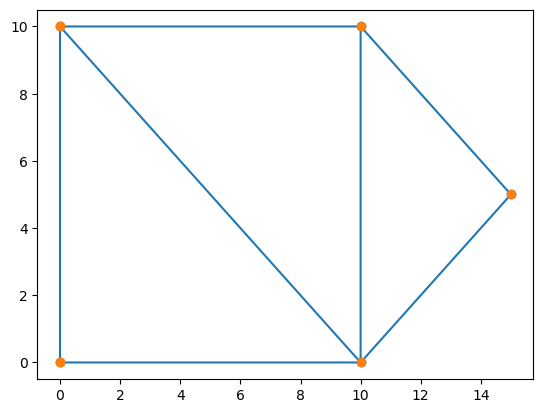

In [86]:
def create_delaunay_triangulation(points):
    # Create a bounding triangle around the points
    bounding_triangle = [(min(points, key=lambda x: x[0])[0] - 1, min(points, key=lambda x: x[1])[1] - 1),
                        (max(points, key=lambda x: x[0])[0] + 1, min(points, key=lambda x: x[1])[1] - 1),
                        (min(points, key=lambda x: x[0])[0] - 1, max(points, key=lambda x: x[1])[1] + 1)]

    triangulation = [bounding_triangle]

    for point in points:
        bad_triangles = []
        for triangle in triangulation:
            if is_point_in_circle(point, triangle):
                bad_triangles.append(triangle)

        polygon = []
        for triangle in bad_triangles:
            for edge in get_edges(triangle):
                if edge not in polygon:
                    polygon.append(edge)

        for edge in polygon:
            triangulation.append([edge[0], edge[1], point])

    # remove the bounding triangle from the triangulation
    triangulation.remove(bounding_triangle)

    return triangulation

def is_point_in_circle(point, triangle):
    # This function checks whether the point is inside the circumcircle of the triangle
    # It uses the cross product method for this

    a, b, c = triangle
    ax, ay = a
    bx, by = b
    cx, cy = c

    d = (ax*ax + ay*ay)*(by - cy) + (bx*bx + by*by)*(cy - ay) + (cx*cx + cy*cy)*(ay - by)
    e = (ax*ax + ay*ay)*(cx - bx) + (bx*bx + by*by)*(ax - cx) + (cx*cx + cy*cy)*(bx - ax)
    f = (ax*ax + ay*ay)*(bx*cy - cx*by) + (bx*bx + by*by)*(cx*ay - ax*cy) + (cx*cx + cy*cy)*(ax*by - bx*ay)

    return (d*point[0] + e*point[1] + f) > 0

def get_edges(triangle):
    edges = []
    edges.append((triangle[0], triangle[1]))
    edges.append((triangle[1], triangle[2]))
    edges.append((triangle[2], triangle[0]))
    return edges


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as tri

points = [[0,0], [10, 0], [15, 5], [10, 10], [0,10]]
tri = create_delaunay_triangulation(points)

points = np.array(points)
plt.scatter(points[:, 0], points[:, 1])

triangulation = tri.Triangulation(points[:, 0], points[:, 1])
#access simplices
print(triangulation.triangles)
#access neighbors
print(triangulation.neighbors)
plt.triplot(triangulation, marker="o")

triang = mtri.Triangulation(xy[:,0], xy[:,1], triangles=triangles)
